In [1]:
import Pkg
Pkg.develop(path="C:/Users/Mathis/Documents/PhD/SDDP_RVI/SDDP2")

   Resolving package versions...
  No Changes to `C:\Users\Mathis\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\Mathis\.julia\environments\v1.9\Manifest.toml`


In [38]:
using Revise
using SDDP
using Plots
using Gurobi
using Statistics
const GRB_ENV = Gurobi.Env()
optimizer=() -> Gurobi.Optimizer(GRB_ENV)

Set parameter Username
Academic license - for non-commercial use only - expires 2026-03-17


#71 (generic function with 1 method)

In [397]:
graph = SDDP.LinearGraph(1)
graph=SDDP.InfiniteLinearGraph(12)

Root
 0
Nodes
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
Arcs
 0 => 1 w.p. 1.0
 1 => 2 w.p. 1.0
 2 => 3 w.p. 1.0
 3 => 4 w.p. 1.0
 4 => 5 w.p. 1.0
 5 => 6 w.p. 1.0
 6 => 7 w.p. 1.0
 7 => 8 w.p. 1.0
 8 => 9 w.p. 1.0
 9 => 10 w.p. 1.0
 10 => 11 w.p. 1.0
 11 => 12 w.p. 1.0
 12 => 1 w.p. 1.0

In [399]:
function subproblem_builder(subproblem::Model, node::Int, discount_factor::Float64)
    # State variables
    @variable(subproblem, 0 <= volume <= 200, SDDP.State, initial_value = 200)
    # Control variables
    @variables(subproblem, begin
        thermal_generation >= 0
        hydro_generation >= 0
        hydro_spill >= 0
    end)
    # Random variables
    @variable(subproblem, inflow)
    Ω = [0.0, 50.0, 100.0]
    P = [1 / 3, 1 / 3, 1 / 3]
    SDDP.parameterize(subproblem, Ω, P) do ω
        return JuMP.fix(inflow, ω)
    end
    # Transition function and constraints
    @constraints(
        subproblem,
        begin
            volume.out == volume.in - hydro_generation - hydro_spill + inflow
            demand_constraint, hydro_generation + thermal_generation == 150
        end
    )
    # Stage-objective
    if node == 1
        @stageobjective(subproblem, 3 * thermal_generation)
    elseif node == 2
        @stageobjective(subproblem, 6 * thermal_generation)
    else
        @stageobjective(subproblem, 9 * thermal_generation)
    end
    return subproblem
end

subproblem_builder (generic function with 1 method)

In [401]:
model1 = SDDP.PolicyGraph(
    subproblem_builder,
    graph;
    sense = :Min,
    lower_bound = 0.0,
    optimizer = optimizer,
    discount_factor=0.99,
)

Cuts1=SDDP.train(model1; sampling_scheme=SDDP.InSampleMonteCarlo(max_depth=3*20, rollout_limit = i -> 3*i), iteration_limit = 10, infinite = true, print_level=0, cut_selection=false, shift_function=SDDP.compute_no_shift)

10-element Vector{SDDP.Log}:
 SDDP.Log(1, 741.1341000000001, 2250.0, 0.029000043869018555, 1, 15, " ", false, Dict{Int64, Vector{Any}}(5 => [], 7 => [], 12 => [], 8 => [], 1 => [(theta = 2227.59, pi = Dict(:volume => -8.91), x = Dict(:volume => 0.0), obj_y = nothing, belief_y = nothing)], 4 => [], 6 => [], 11 => [], 2 => [(theta = 1791.0, pi = Dict(:volume => -9.0), x = Dict(:volume => 0.0), obj_y = nothing, belief_y = nothing)], 10 => []…))
 SDDP.Log(2, 3463.2150368709, 3303.0, 0.029000043869018555, 1, 42, " ", false, Dict{Int64, Vector{Any}}(5 => [(theta = 1791.0, pi = Dict(:volume => -9.0), x = Dict(:volume => 0.0), obj_y = nothing, belief_y = nothing)], 7 => [], 12 => [], 8 => [], 1 => [(theta = 3195.1667039099993, pi = Dict(:volume => -6.920698), x = Dict(:volume => 200.0), obj_y = nothing, belief_y = nothing)], 4 => [(theta = 2232.09, pi = Dict(:volume => -9.0), x = Dict(:volume => 49.0), obj_y = nothing, belief_y = nothing)], 6 => [(theta = 900.0, pi = Dict(:volume => -9.0), x =

In [400]:
model2 = SDDP.PolicyGraph(
    subproblem_builder,
    graph;
    sense = :Min,
    lower_bound = 0.0,
    optimizer = optimizer,
    discount_factor=0.99,
)

Cuts2=SDDP.train(model2; sampling_scheme=SDDP.InSampleMonteCarlo(max_depth=3*20, rollout_limit = i -> 3*i), iteration_limit = 10, infinite = true, print_level=0, cut_selection=false, shift_function=SDDP.compute_best_shift)

(900.0, 0.0, 788.2142041653233)
(1773.0899999999997, 882.0899999999997, 1036.1376647588168)
(887.085, 883.5749999999999, 882.0900000000001)
(883.5900000000001, 882.5850000000004, 882.4809741635704)
(882.0900000000006, 882.5850000000004, 882.0900000000001)
(882.0900000000003, 882.5850000000004, 882.0900000000001)
(882.0900000000001, 882.5850000000004, 882.7457474499154)
(882.0900000000001, 882.5850000000004, 882.0899999999997)
(882.0900000000001, 882.5850000000004, 882.59739566795)
(882.0900000000004, 882.5850000000004, 882.6338160363298)
(882.0900000000001, 882.5850000000004, 882.0899999999999)
(882.0899999999997, 882.5850000000004, 882.0899999999999)
(882.09, 882.5850000000004, 882.0899999999997)
(882.0899999999999, 882.5850000000004, 882.0900000000004)
(882.0899999999995, 882.5850000000004, 882.0900000000001)
(882.0899999999999, 882.5850000000004, 882.2873268483822)
(882.0899999999995, 882.5850000000004, 882.2761381706821)
(882.0899999999995, 882.5850000000004, 882.3048944674438)


10-element Vector{SDDP.Log}:
 SDDP.Log(1, 233.86363636363632, 1650.0, 0.0970001220703125, 1, 15, " ", false, Dict{Int64, Vector{Any}}(5 => [], 7 => [], 12 => [], 8 => [], 1 => [(theta = 1140.0749999999998, pi = Dict(:volume => -8.91), x = Dict(:volume => 50.0), obj_y = nothing, belief_y = nothing)], 4 => [], 6 => [], 11 => [], 2 => [(theta = 1642.5, pi = Dict(:volume => -9.0), x = Dict(:volume => 0.0), obj_y = nothing, belief_y = nothing)], 10 => []…))
 SDDP.Log(2, 300.0, 3882.272727272727, 0.1360001564025879, 1, 42, " ", false, Dict{Int64, Vector{Any}}(5 => [(theta = 1642.5, pi = Dict(:volume => -9.0), x = Dict(:volume => 0.0), obj_y = nothing, belief_y = nothing)], 7 => [], 12 => [], 8 => [], 1 => [(theta = 153.0020681818183, pi = Dict(:volume => -6.9403), x = Dict(:volume => 177.95454545454544), obj_y = nothing, belief_y = nothing)], 4 => [(theta = 1790.9999999999998, pi = Dict(:volume => -9.0), x = Dict(:volume => 0.0), obj_y = nothing, belief_y = nothing)], 6 => [(theta = 900.0, p

In [407]:
SDDP.compare_two_models(
    model1,
    model1;
    replications = 50,
    TimeHorizon = 300,
    discount_factor = 0.99,
)

 WARNING 


(72995.7834259129, 2804.3988938349053, 72995.7834259129, 2804.3988938349053)

In [404]:
SDDP.count_all_active_cuts(Cuts2, model2, 1e-4)
SDDP.count_all_active_cuts(Cuts1, model1, 1e-4)
# Cuts2[end].iter_cuts[1]

5 15
12 9
8 12
1 7
6 14
11 10
9 11
3 9
7 14
4 17
2 9
10 11
5 1
12 1
8 1
1 1
6 1
11 1
9 1
3 1
7 1
4 1
2 1
10 1


12

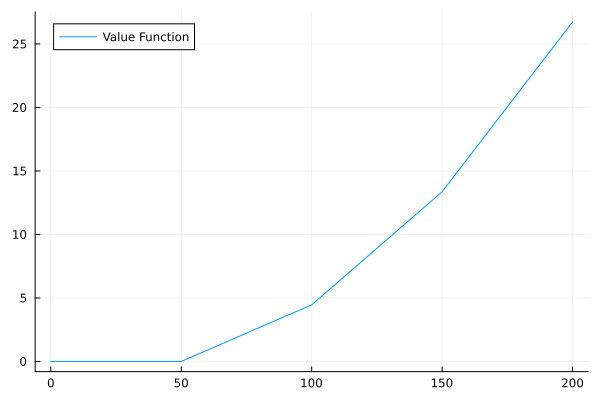

In [394]:
node=model1.nodes[3]
TV=[SDDP.compute_TV(node.two_stage, Dict(:volume=>1.0*i)) for i in 0:200]
V=[SDDP.compute_V(node.value_function, Dict(:volume=>1.0*i)) for i in 0:200]
plot(0:200, [TV[i+1]-V[i+1] for i in 0:200], label="Value Function")

In [372]:
TV[end]-V[end]

415.19982259315407

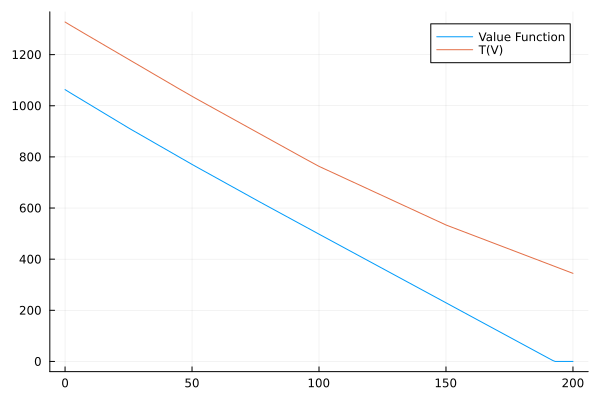

In [381]:
plot(0:200, V, label="Value Function")
plot!(0:200, TV, label="T(V)")

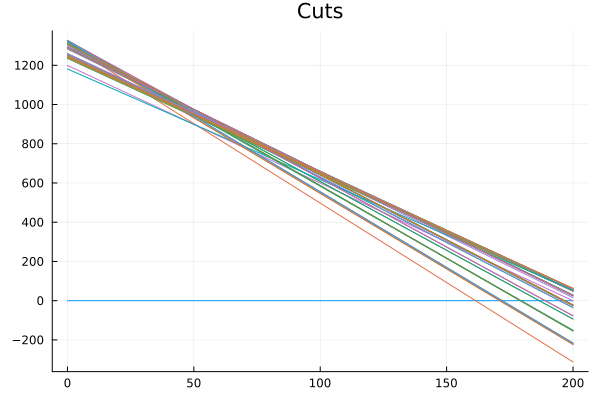

In [378]:
ind=[i for i in 0:0.1:200]
plot(ind, [0+0*9.7*10^4 for i in ind], legend = false)
node=1
for c in Cuts2
    cnode=c.iter_cuts[node]
    for i in 1:length(cnode)
        theta=cnode[i][1]
        a=cnode[i][2][:volume]
        x_k=cnode[i][3][:volume]
        # println((a, theta, x_k))
        plot!(ind, [a*(i-x_k)+theta for i in ind])
    end
end
# plot!(1:200, Th)

title!("Cuts")